# **Load datasets**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
constructor_performance = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Constructor_Performance.csv')
constructor_rankings = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Constructor_Rankings.csv')
driver_details = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Driver_Details.csv')
driver_rankings = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Driver_Rankings.csv')
lap_timings = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Lap_Timings.csv')
pit_stop_records = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Pit_Stop_Records.csv')
qualifying_results = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Qualifying_Results.csv')
race_results = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Race_Results.csv')
race_schedule = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Race_Schedule.csv')
race_status = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Race_Status.csv')
season_summaries = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Season_Summaries.csv')
sprint_race_results = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Sprint_Race_Results.csv')
team_details = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Team_Details.csv')
track_information = pd.read_csv('/kaggle/input/formula-1-world-championship-history-1950-2024/Track_Information.csv')


In [2]:
datasets = {
    'Constructor Performance': constructor_performance,
    'Constructor Rankings': constructor_rankings,
    'Driver Details': driver_details,
    'Driver Rankings': driver_rankings,
    'Lap Timings': lap_timings,
    'Pit Stop Records': pit_stop_records,
    'Qualifying Results': qualifying_results,
    'Race Results': race_results,
    'Race Schedule': race_schedule,
    'Race Status': race_status,
    'Season Summaries': season_summaries,
    'Sprint Race Results': sprint_race_results,
    'Team Details': team_details,
    'Track Information': track_information
}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.head())
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())
    print("\n")

Dataset: Constructor Performance
   constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12505 entries, 0 to 12504
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12505 non-null  int64  
 1   raceId                12505 non-null  int64  
 2   constructorId         12505 non-null  int64  
 3   points                12505 non-null  float64
 4   status                12505 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 488.6+ KB
None
       constructorResultsId        raceId  constructorId     

In [3]:
qualifying_results['q2'] = qualifying_results['q2'].fillna(method='ffill')
qualifying_results['q3'] = qualifying_results['q3'].fillna(method='ffill')

# **EDA**

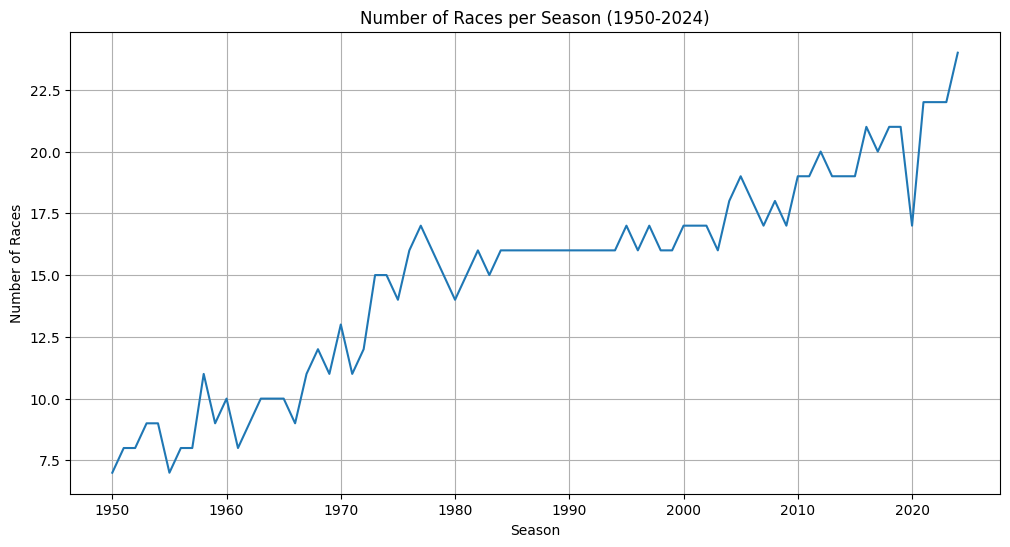

In [4]:
races_per_season = race_schedule.groupby('year').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=races_per_season.index, y=races_per_season.values)
plt.title('Number of Races per Season (1950-2024)')
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.grid(True)
plt.show()

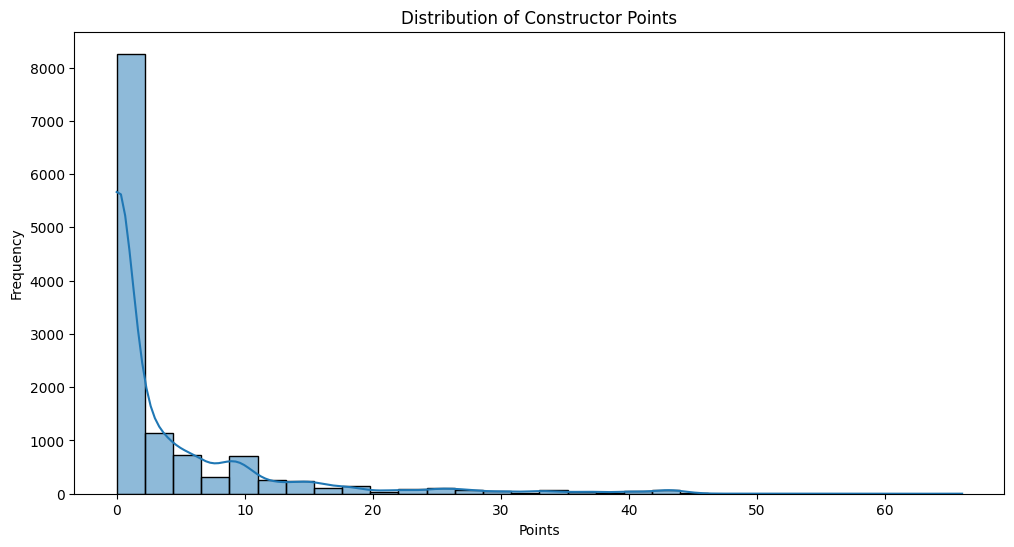

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(constructor_performance['points'], bins=30, kde=True)
plt.title('Distribution of Constructor Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

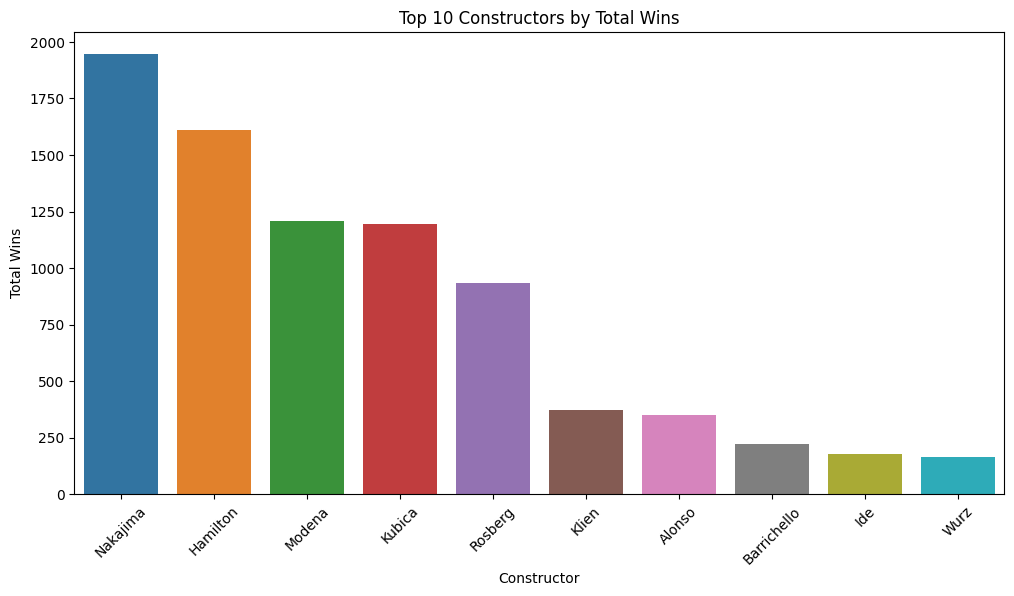

In [6]:
top_constructors = constructor_rankings.groupby('constructorId').agg({'wins': 'sum'}).sort_values(by='wins', ascending=False).head(10)
top_constructors = top_constructors.merge(driver_details[['driverId', 'surname']], how='left', left_on='constructorId', right_on='driverId')
plt.figure(figsize=(12, 6))
sns.barplot(x='surname', y='wins', data=top_constructors)
plt.title('Top 10 Constructors by Total Wins')
plt.xlabel('Constructor')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

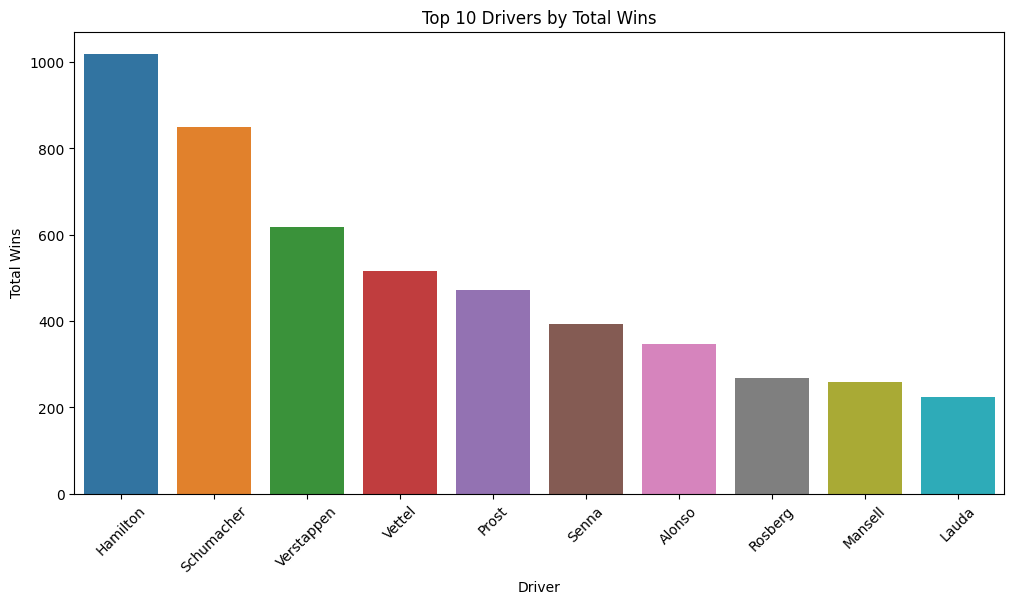

In [7]:
top_drivers = driver_rankings.groupby('driverId').agg({'wins': 'sum'}).sort_values(by='wins', ascending=False).head(10)
top_drivers = top_drivers.merge(driver_details[['driverId', 'surname']], how='left', on='driverId')
plt.figure(figsize=(12, 6))
sns.barplot(x='surname', y='wins', data=top_drivers)
plt.title('Top 10 Drivers by Total Wins')
plt.xlabel('Driver')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.show()

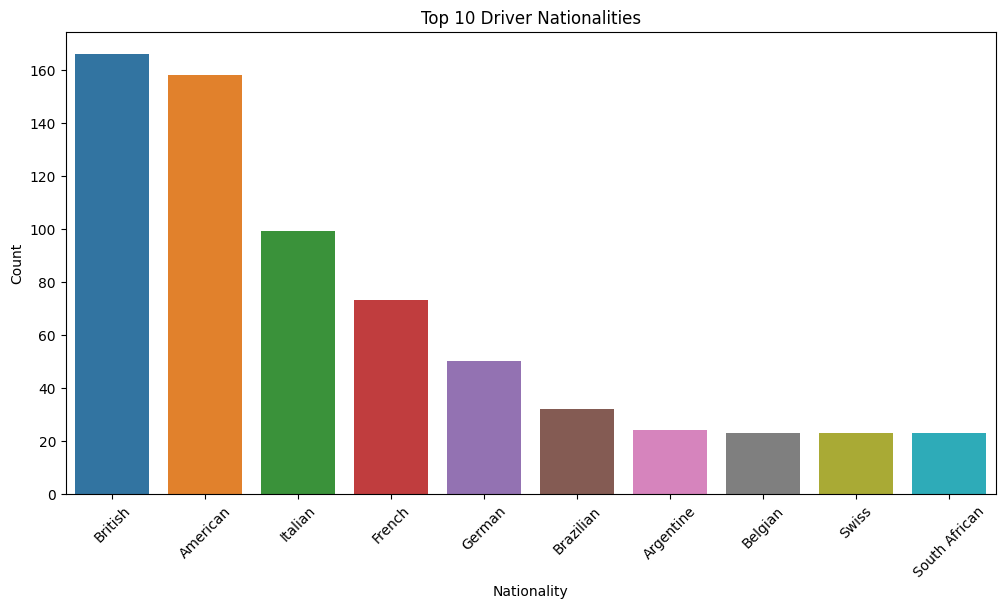

In [8]:
driver_nationality = driver_details['nationality'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=driver_nationality.index, y=driver_nationality.values)
plt.title('Top 10 Driver Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
lap_times_by_driver = lap_timings.groupby(['driverId', 'raceId'])['milliseconds'].mean().reset_index()
lap_times_by_driver.columns = ['driverId', 'raceId', 'average_lap_time']

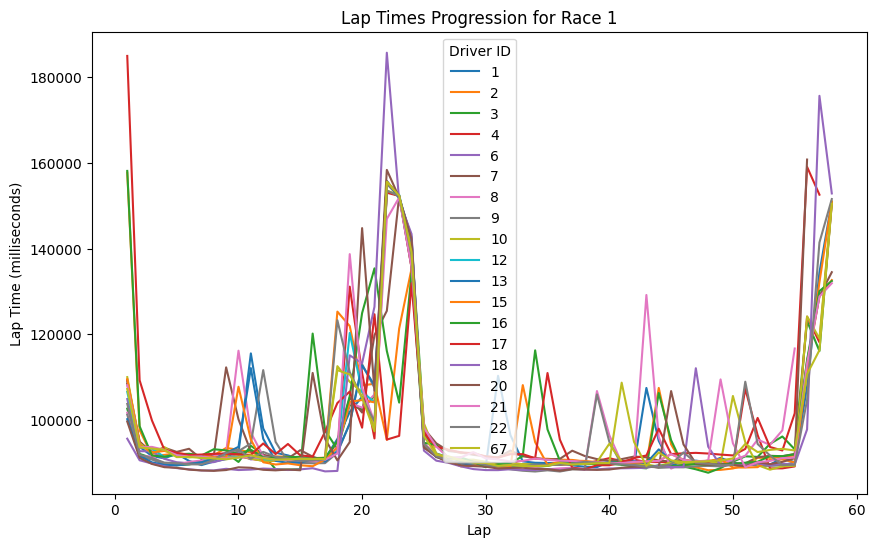

In [10]:
specific_race_lap_times = lap_timings[lap_timings['raceId'] == 1]
plt.figure(figsize=(10, 6))


sns.lineplot(
    data=specific_race_lap_times, 
    x='lap', 
    y='milliseconds', 
    hue='driverId', 
    palette='tab10'  
)


plt.title('Lap Times Progression for Race 1')
plt.xlabel('Lap')
plt.ylabel('Lap Time (milliseconds)')
plt.legend(title='Driver ID')
plt.show()


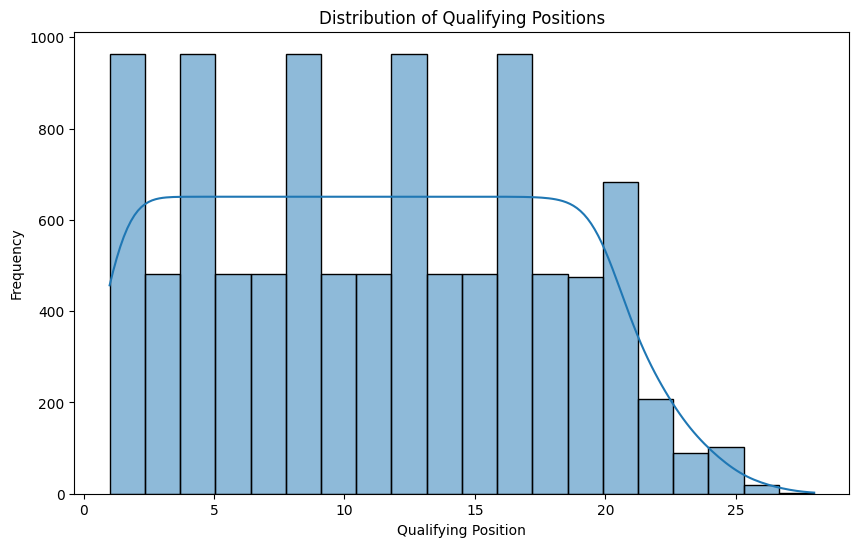

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(qualifying_results['position'], bins=20, kde=True)
plt.title('Distribution of Qualifying Positions')
plt.xlabel('Qualifying Position')
plt.ylabel('Frequency')
plt.show()


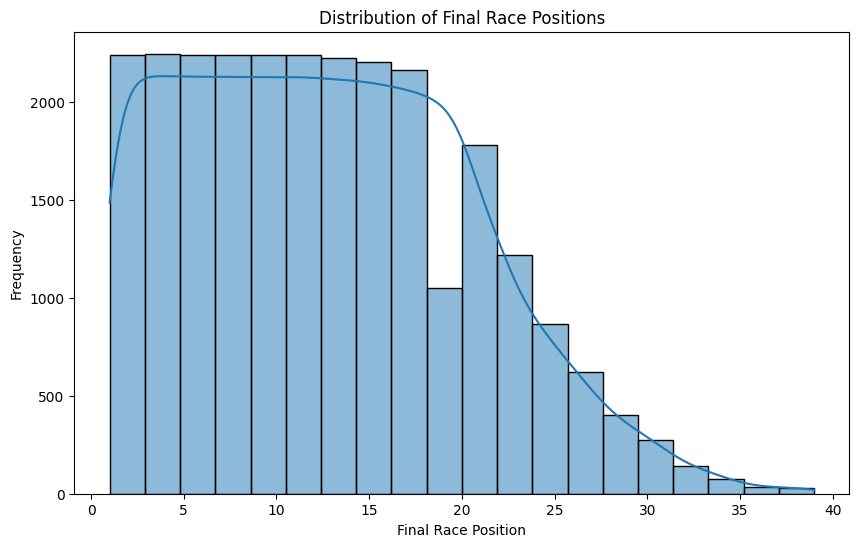

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(race_results['positionOrder'], bins=20, kde=True)
plt.title('Distribution of Final Race Positions')
plt.xlabel('Final Race Position')
plt.ylabel('Frequency')
plt.show()


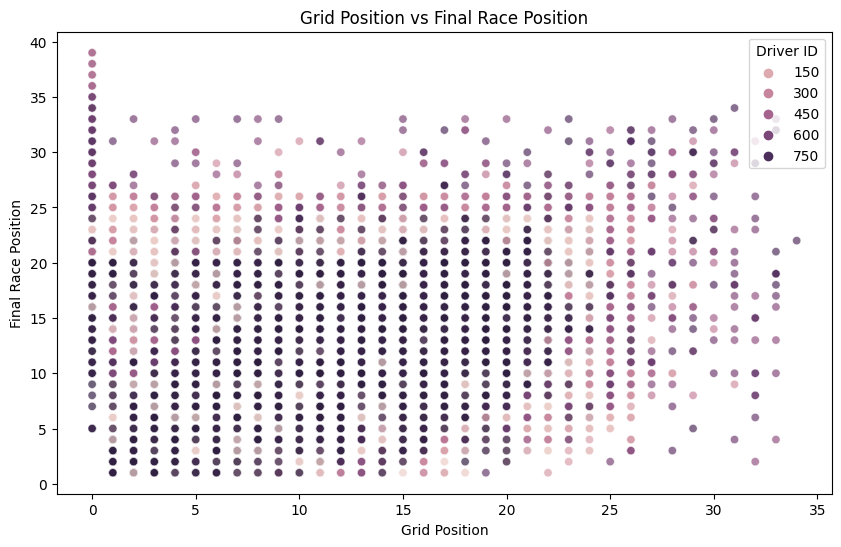

In [13]:
points_by_driver = race_results.groupby('driverId')['points'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=race_results, x='grid', y='positionOrder', hue='driverId', alpha=0.7)
plt.title('Grid Position vs Final Race Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Race Position')
plt.legend(title='Driver ID')
plt.show()

In [14]:
combined_data = race_results.merge(lap_timings, on=['raceId', 'driverId'], suffixes=('_result', '_lap'))
combined_data = combined_data.merge(pit_stop_records, on=['raceId', 'driverId'], suffixes=('', '_pit'))
combined_data = combined_data.merge(qualifying_results, on=['raceId', 'driverId'], suffixes=('', '_qual'))

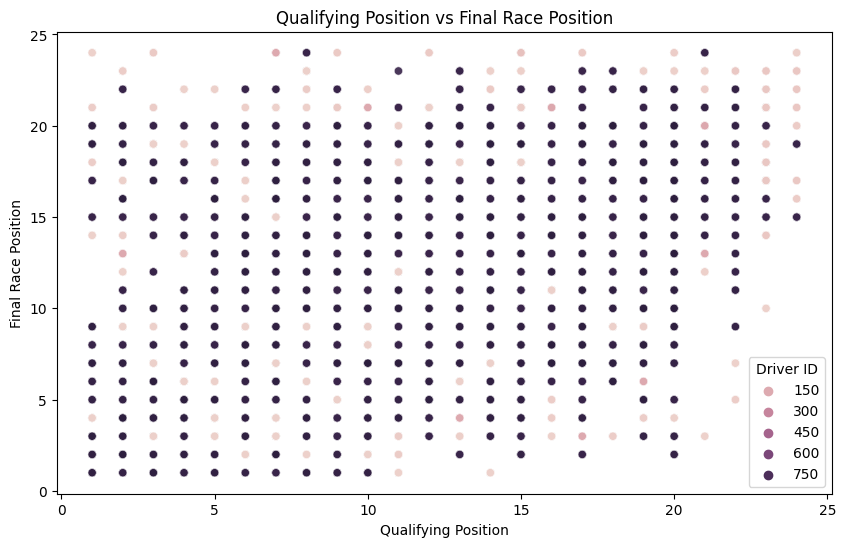

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='position', y='positionOrder', hue='driverId', alpha=0.7)
plt.title('Qualifying Position vs Final Race Position')
plt.xlabel('Qualifying Position')
plt.ylabel('Final Race Position')
plt.legend(title='Driver ID')
plt.show()